In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


algo has 12500 values
unlab has 12500 values
comp has 12500 values
folds has 12500 values
Accuracy has 12500 values


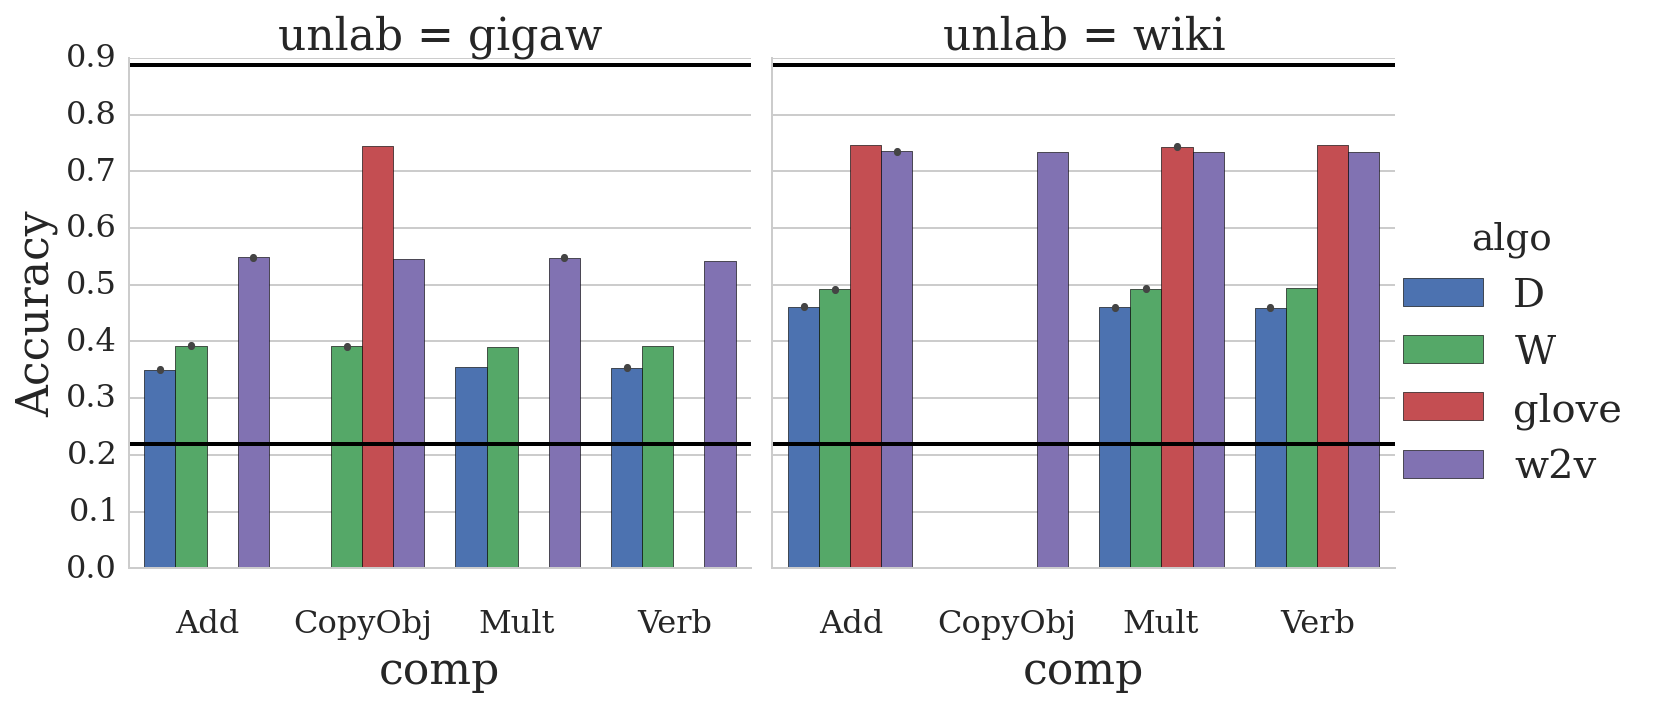

In [2]:
s = {'document_features_ev': 'J+N+V+SVO',
    'document_features_tr': 'J+N+V',
    'expansions__allow_overlap': 1, # todo don't like this
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
#      todo add LDA, turian below
    'expansions__vectors__algorithm__in': ['count_dependencies', 'count_windows', 'glove', 'word2vec'],
    'expansions__vectors__composer__in': ['Socher', 'Verb', 'Add', 'CopyObj', 'Mult'], 
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
#     'expansions__vectors__unlabelled': 'gigaw',
    'expansions__vectors__unlabelled_percentage': 100,
    'expansions__vectors__use_ppmi': 0,
    'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)

fields = {  'unlab': 'expansions__vectors__unlabelled',
            'algo': 'expansions__vectors__algorithm',
            'comp': 'expansions__vectors__composer'}
df = dataframe_from_exp_ids(ids, fields)
# df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]

g= sns.factorplot(y='Accuracy', x='comp', hue='algo', col='unlab', 
#                   hue_order=sort_df_by(df, 'corpus'), 
                  col_wrap=2,
                   data=df, kind='bar');

for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
    ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k')

plt.savefig('plot-vps-basic.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)